In [32]:
import pandas as pd 
import numpy as np  
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

movie_df = pd.read_csv('movie_master_dataset.csv', encoding = "ISO-8859-1")

#Get the first 500 successful movies based on gross 
hg = movie_df.sort(['gross'], ascending = False)
hg = hg.reset_index(drop=True)
hg = hg.head(500)

directors = set(movie_df['director_name'].tolist()) 
director_hits = {} 
for director in directors: 
    df = hg[hg['director_name'] == director]
    director_hits[director] = len(df)

def get_hits(row): 
    return director_hits[row['director_name']] 

def get_title_length(row): 
    return len(row['movie_title'].split())

#Retrieve hits for the director and format the movie duration 
movie_df['director_hits'] = movie_df.apply(lambda row: get_hits(row),axis=1)
movie_df['duration'] = movie_df['duration'].apply(lambda x: str(x))
movie_df['duration'] = movie_df['duration'].apply(lambda x: int(x[:3]) if x[0] == '1' else int(x[:2]))  
movie_df['title_len'] = movie_df.apply(lambda row: get_title_length(row), axis=1)  


top_genres = ['Action', 'Drama', 'Thriller', 'Comedy', 'Romance']
unpopular_genres = ['Documentary', 'Musical', 'History']

def get_movies(movie_df): 
    movies = [] 
    keep = ['movie_title', 'gross', 'duration', 'budget', 'director_hits', 'facenumber_in_poster', 'title_len']
    action = movie_df[movie_df['genres'].str.contains('Action')]
    action = action[keep]
    movies.append(action)

    drama = movie_df[movie_df['genres'].str.contains('Drama')]
    drama = drama[keep]
    movies.append(drama)

    thriller = movie_df[movie_df['genres'].str.contains('Thriller')]
    thriller = thriller[keep]
    movies.append(thriller)
    
    comedy = movie_df[movie_df['genres'].str.contains('Comedy')]
    comedy = comedy[keep]
    movies.append(comedy)
    
    romance = movie_df[movie_df['genres'].str.contains('Romance')]
    romance = romance[keep]
    movies.append(romance)
    
    documentary = movie_df[movie_df['genres'].str.contains('Documentary')]
    documentary = documentary[keep]
    movies.append(documentary)
    
    musical = movie_df[movie_df['genres'].str.contains('Musical')]
    musical = musical[keep]
    movies.append(musical)
    
    history = movie_df[movie_df['genres'].str.contains('History')]
    history = history[keep]
    movies.append(history)
    
    return movies

movies = get_movies(movie_df) 

def ols(data, feature1, feature2, feature3): 
    model = smf.ols(formula='gross ~ title_len + budget + duration', data=data).fit()
    model.summary()
    print(model.summary())

    fig = plt.figure(figsize=(12,10))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    


In [33]:
from scipy.stats import pearsonr

#Check for any correlation between the predictor variabales 
duration = movie_df['duration'].tolist() 
budget =  movie_df['budget'].tolist() 
director_hits = movie_df['director_hits'].tolist() 
title_len = movie_df['title_len'].tolist() 

duration_budget = pearsonr(duration, budget)
print('Correlation between duration and budget is ' + str(duration_budget[0])) 

duration_director_hits = pearsonr(duration, director_hits)
print("Correlation between duration and the director's number of successful movies is " + str(duration_director_hits[0])) 

duration_title_len = pearsonr(duration, title_len) 
print("Correlation between duration and the movie title's length is " + str(duration_title_len[0])) 

budget_director_hits = pearsonr(budget, director_hits)
print('Correlation between budget and the number of successful movie the director has made is ' + str(budget_director_hits[0]))

budget_title_len = pearsonr(budget, title_len)
print("Correlation between budget and the movie title's length is " + str(budget_title_len[0])) 

director_hits_title_len = pearsonr(budget, title_len)
print("Correlation between the director's number of successful movies and the movie title's length is " + str(director_hits_title_len[0])) 

Correlation between duration and budget is 0.0885455717556
Correlation between duration and the director's number of successful movies is 0.20813319372
Correlation between duration and the movie title's length is 0.000116934500448
Correlation between budget and the number of successful movie the director has made is 0.0471856007326
Correlation between budget and the movie title's length is 0.00661805321172
Correlation between the director's number of successful movies and the movie title's length is 0.00661805321172


Results for Action Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.411
Date:                Sat, 10 Dec 2016   Prob (F-statistic):            0.00107
Time:                        17:25:15   Log-Likelihood:                -38337.
No. Observations:                1162   AIC:                         7.668e+04
Df Residuals:                    1158   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.378e+13   8.

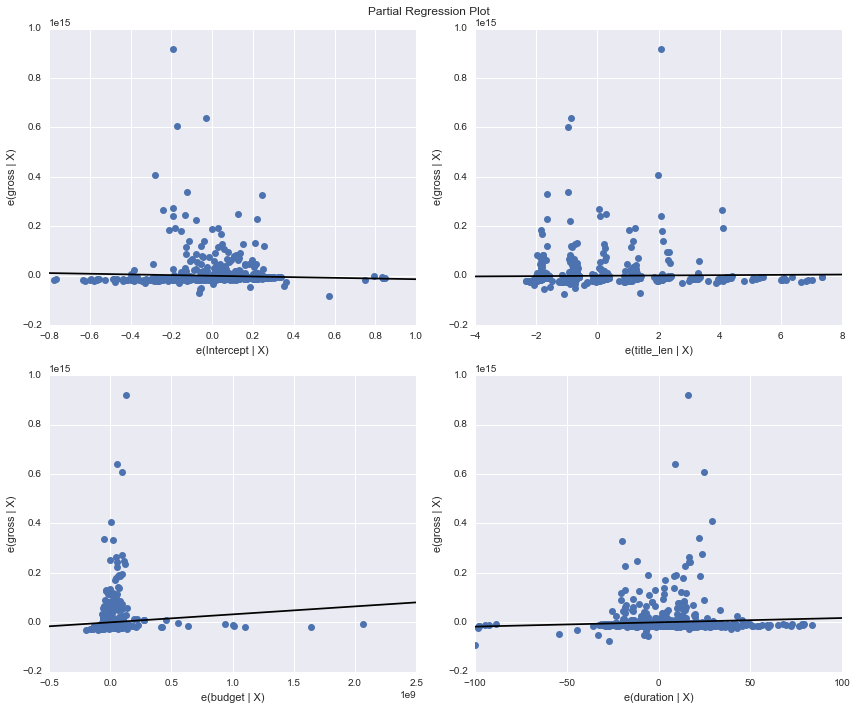

In [34]:
print('Results for ' + top_genres[0] + ' Movies')
ols(movies[0], 'duration', 'title_len', 'budget') 

Results for Action Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:          16828751941570.586
Model:                            OLS   Adj. R-squared:     16872312127786.900
Method:                 Least Squares   F-statistic:                    -386.3
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               1.00
Time:                        16:56:35   Log-Likelihood:                -38319.
No. Observations:                1162   AIC:                         7.664e+04
Df Residuals:                    1159   BIC:                         7.666e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
duration       5.188

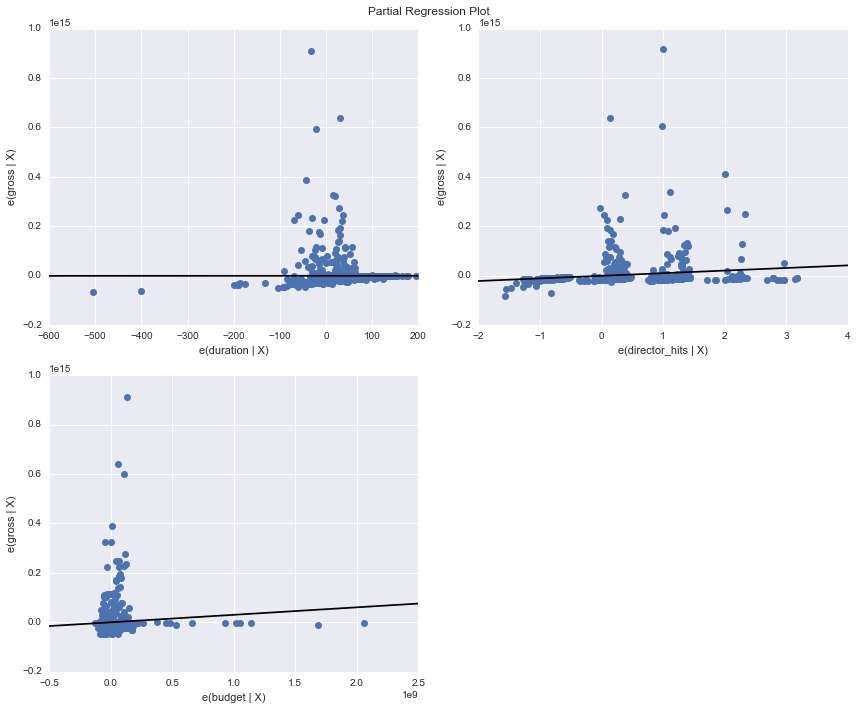

In [26]:
print('Results for ' + top_genres[0] + ' Movies')
ols(movies[0], 'duration', 'director_hits', 'budget') 

Results for Drama Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:           -119293001185.386
Model:                            OLS   Adj. R-squared:      -119440215913.300
Method:                 Least Squares   F-statistic:                    -810.3
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        18:52:01   Log-Likelihood:                -77999.
No. Observations:                2434   AIC:                         1.560e+05
Df Residuals:                    2431   BIC:                         1.560e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    4.373e+10   6.9

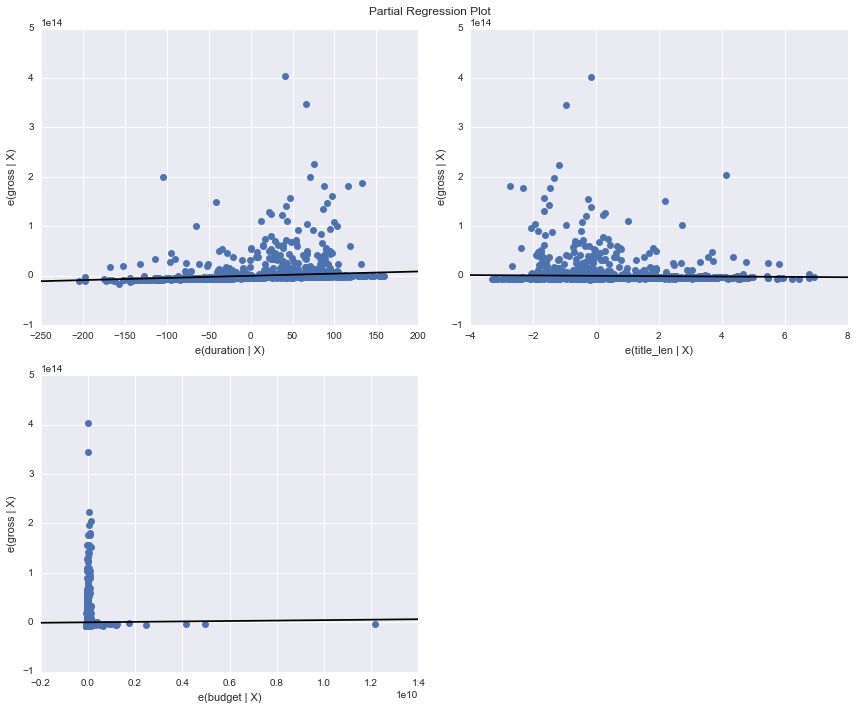

In [153]:
print('Results for ' + top_genres[1] + ' Movies')
ols(movies[1])

Results for Thriller Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:           2031360536649.830
Model:                            OLS   Adj. R-squared:      2035799052024.882
Method:                 Least Squares   F-statistic:                    -457.7
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        18:52:05   Log-Likelihood:                -44798.
No. Observations:                1376   AIC:                         8.960e+04
Df Residuals:                    1373   BIC:                         8.962e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration     3.27e+10   

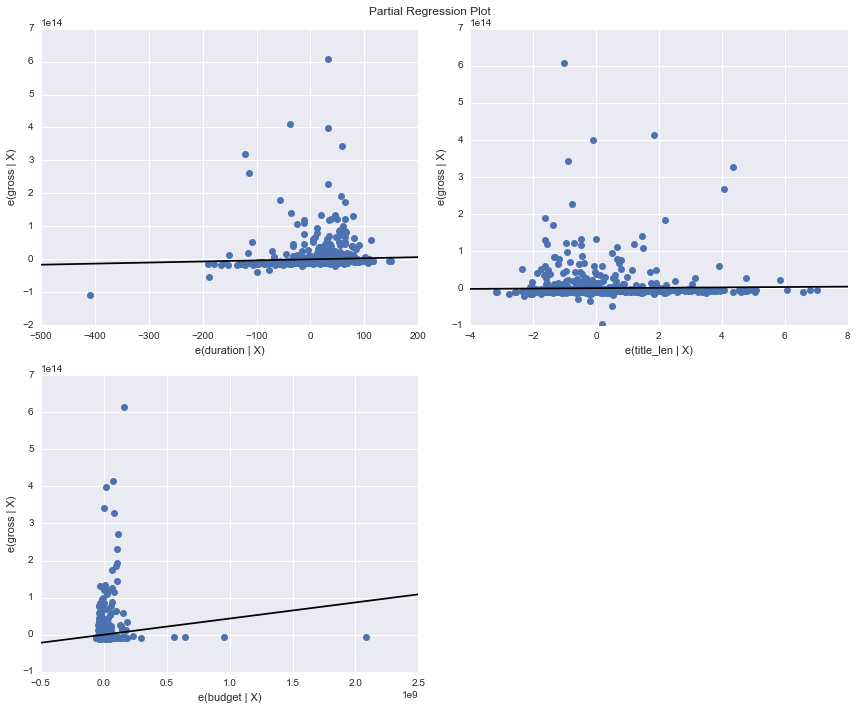

In [154]:
print('Results for ' + top_genres[2] + ' Movies')
ols(movies[2])

Results for Comedy Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:           -364488262932.145
Model:                            OLS   Adj. R-squared:      -365102914303.027
Method:                 Least Squares   F-statistic:                    -593.0
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        18:52:08   Log-Likelihood:                -57682.
No. Observations:                1782   AIC:                         1.154e+05
Df Residuals:                    1779   BIC:                         1.154e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    7.005e+10   1.

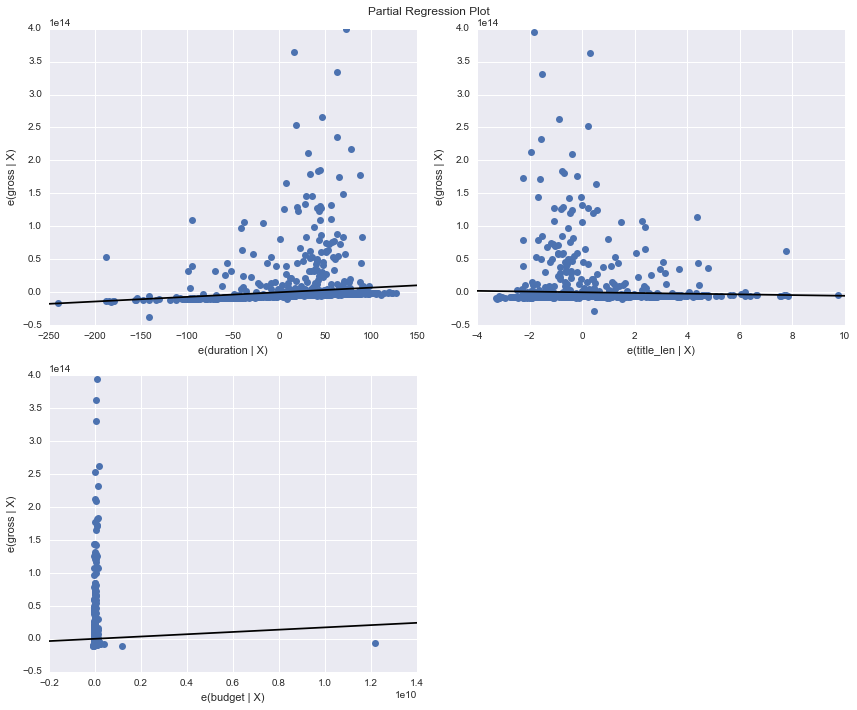

In [155]:
print('Results for ' + top_genres[3] + ' Movies')
ols(movies[3])

Results for Romance Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:             36711634088.975
Model:                            OLS   Adj. R-squared:        36816225639.084
Method:                 Least Squares   F-statistic:                    -351.0
Date:                Mon, 21 Nov 2016   Prob (F-statistic):               1.00
Time:                        18:52:12   Log-Likelihood:                -33575.
No. Observations:                1056   AIC:                         6.716e+04
Df Residuals:                    1053   BIC:                         6.717e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    3.049e+10   9

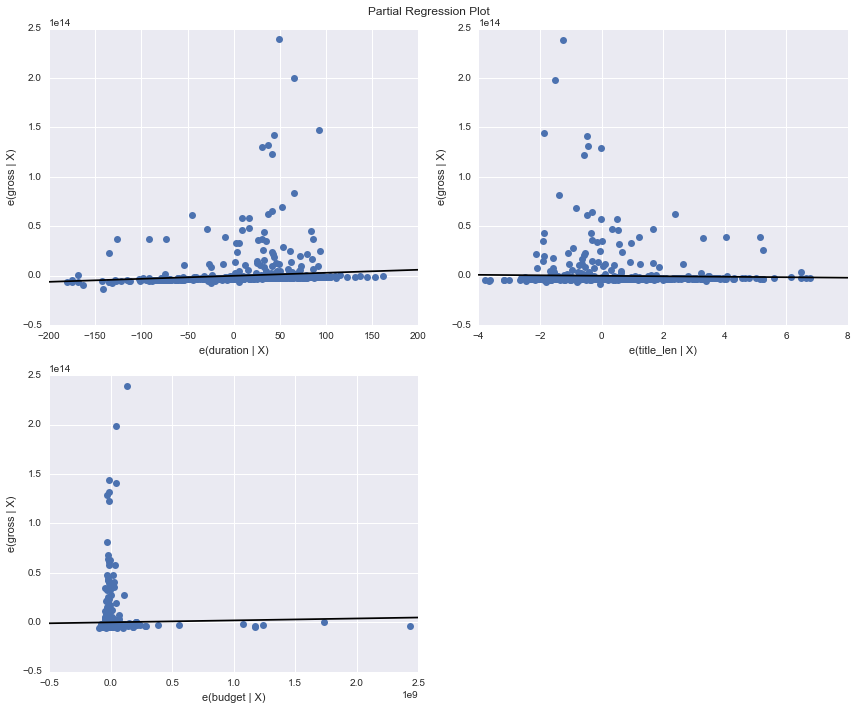

In [156]:
print('Results for ' + top_genres[4] + ' Movies')
ols(movies[4])

Results for Documentary Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     4.340
Date:                Sat, 10 Dec 2016   Prob (F-statistic):             0.0192
Time:                        13:26:44   Log-Likelihood:                -374.19
No. Observations:                  20   AIC:                             754.4
Df Residuals:                      17   BIC:                             757.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    2.216e+05

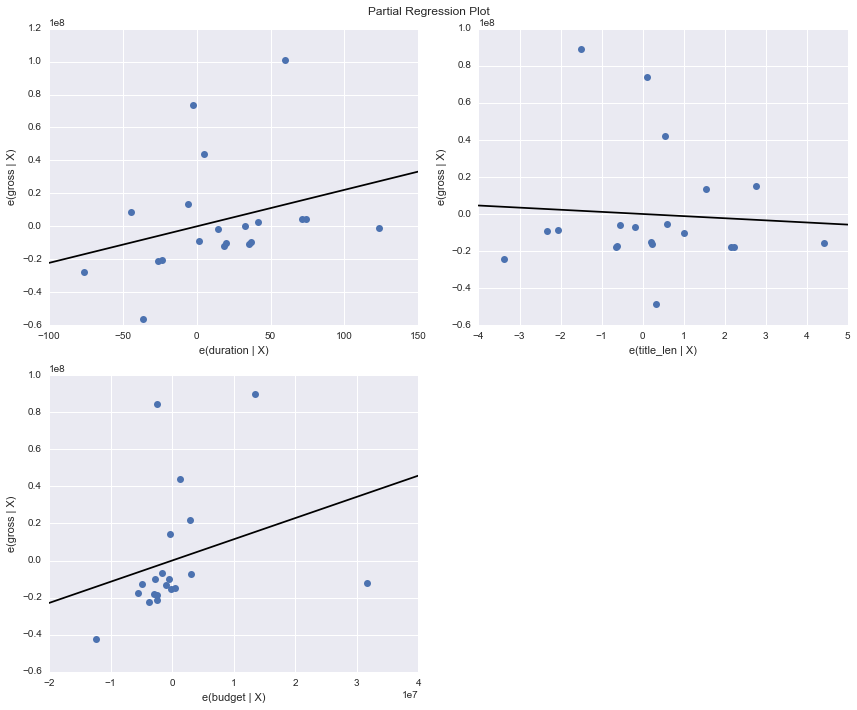

In [19]:
print('Results for ' + unpopular_genres[0] + ' Movies')
ols(movies[5], 'duration', 'title_len', 'budget')

Results for Musical Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:            -48242803263.274
Model:                            OLS   Adj. R-squared:       -49608165619.810
Method:                 Least Squares   F-statistic:                    -35.33
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               1.00
Time:                        13:30:40   Log-Likelihood:                -3590.0
No. Observations:                 109   AIC:                             7186.
Df Residuals:                     106   BIC:                             7194.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    1.554e+11   7

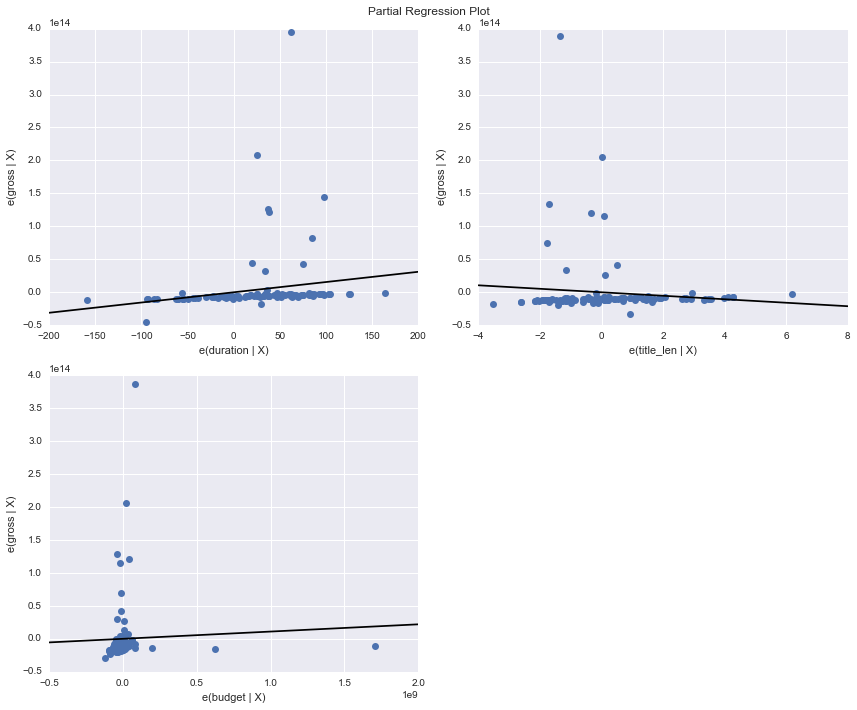

In [20]:
print('Results for ' + unpopular_genres[1] + ' Movies')
ols(movies[6], 'duration', 'title_len', 'budget')

Results for History Movies
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:            -38243873899.126
Model:                            OLS   Adj. R-squared:       -38829239315.965
Method:                 Least Squares   F-statistic:                    -65.33
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               1.00
Time:                        13:31:32   Log-Likelihood:                -6515.3
No. Observations:                 199   AIC:                         1.304e+04
Df Residuals:                     196   BIC:                         1.305e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration    1.011e+11   4

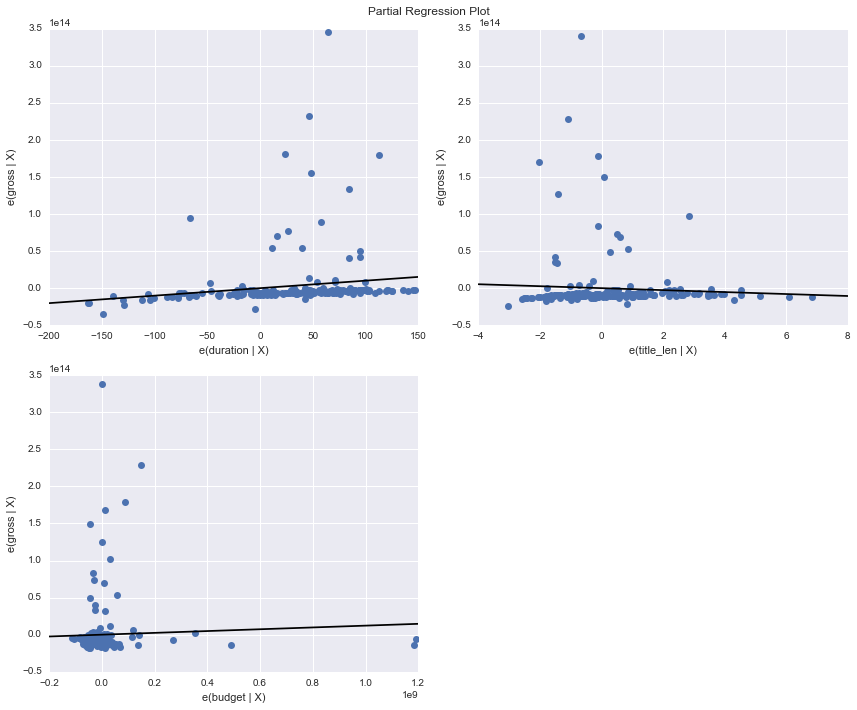

In [21]:
print('Results for ' + unpopular_genres[2] + ' Movies')
ols(movies[7], 'duration', 'title_len', 'budget')

In [157]:
import nltk
from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
%matplotlib inline

hg = movie_df.sort(['gross'], ascending = False)
hg = hg.reset_index(drop=True)
hg = hg.head(1000)

titles = list(hg['movie_title']) 
keywords = list(hg['plot_keywords'])
keywords = [key.replace('|', ' ') for key in keywords]

def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(keywords) 
terms = tfidf_vectorizer.get_feature_names() 

dist = 1 - cosine_similarity(tfidf_matrix)
k = 5

km = KMeans(n_clusters=k)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

print("Top terms per cluster:")
asc_order_centroids = km.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = tfidf_vectorizer.get_feature_names()
labels = [] 
for i in range(5):
    print("Cluster {}:".format(i))
    temp = {i: []}
    for ind in order_centroids[i, :10]:
        temp[i].append(terms[ind])
        print(' {}'.format(terms[ind]))
    print('')
    labels.append(temp) 
    
words = ['', '', '', '', ''] 
index = 0 
for i in labels: 
    for j in i: 
        for k in range(len(i[j])): 
            if k == (len(i[j]) - 1): 
                words[index] += i[j][k]
            else: 
                words[index] += i[j][k] + ','
    index += 1 
    
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist) 
xs, ys = pos[:, 0], pos[:, 1]

# set up colors per clusters using a dict
cluster_colors = {0: '#16a085', 1: '#2c3e50', 2: '#8e44ad', 3: '#2980b9', 4: '#e67e22'} 

# set up cluster names using a dict
cluster_names = {0: words[0], 
                 1: words[1], 
                 2: words[2], 
                 3: words[3], 
                 4: words[4]}

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
print("done")

Top terms per cluster:
Cluster 0:
 female
 relationship
 police
 nudity
 sex
 death
 car
 man
 male
 love

Cluster 1:
 box
 office
 box office
 box office flop
 flop
 office flop
 box office hit
 office hit
 hit
 bashed

Cluster 2:
 new
 city
 york
 new york
 york city
 new york city
 star
 word title
 sex
 dead

Cluster 3:
 title
 word title
 word
 character
 island
 animal
 reference
 party
 woman
 female

Cluster 4:
 based
 battle
 book
 novel
 true
 true story
 story
 based true
 based true story
 superhero

done


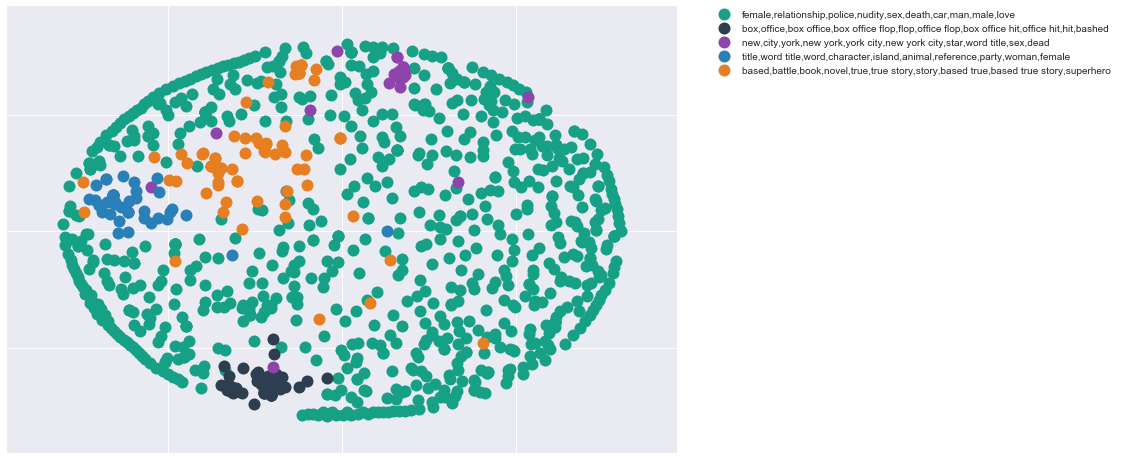

In [158]:
#cluster groups 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 8)) 
ax.margins(0.10) 

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')
    
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

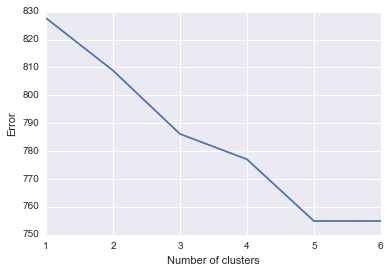

In [137]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    
evaluate_clusters(tfidf_matrix, 6)